# Imports

Importing all required modules.

In [39]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

import core.information_bars.bars as cib

# TODO(vr): Use below when Tick data will be in PQ on S3
# import im.kibot.data.load as vkdl
import im.kibot.data.load.file_path_generator as vkdlf
import im.kibot.data.types as vkdt

plt.style.use("seaborn-talk")
plt.style.use("bmh")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Constants

Defining constants to work with through this notebook.

In [63]:
TICK_M = 100
VOLUME_M = 100
DOLLAR_VOLUME_M = 100
PLOT_FIGURE_SIZE = (10, 7)

# Download

In [41]:
# TODO(vr): Use below when Tick data will be in PQ on S3
# downloader = vkdl.KibotDataLoader()
# source_df = downloader.read_data(
#     symbol='TT',
#     asset_class=vkdt.AssetClass.Futures,
#     frequency=vkdt.Frequency.Tick,
#     contract_type=vkdt.ContractType.Continuous,
#     nrows=1000
# )
# source_df

path_generator = vkdlf.FilePathGenerator()
remote_path = path_generator.generate_file_path(
    symbol="TT",
    asset_class=vkdt.AssetClass.Futures,
    frequency=vkdt.Frequency.Tick,
    contract_type=vkdt.ContractType.Continuous,
    ext=vkdt.Extension.CSV,
)
source_df = pd.read_csv(
    remote_path,
    header=0,
    nrows=1000,
    parse_dates=[["date", "time"]],
    names=["date", "time", "price", "volume"],
)
source_df

,date_time,price,volume
0,2009-09-28 03:13:24,246.8,1
1,2009-09-28 03:15:27,246.4,1
2,2009-09-28 03:17:29,246.2,1
3,2009-09-28 03:19:31,245.7,1
4,2009-09-28 03:21:34,245.7,1
...,...,...,...
995,2009-10-20 05:49:22,249.8,25
996,2009-10-20 06:05:02,249.8,25
997,2009-10-20 06:20:56,249.8,13
998,2009-10-20 06:26:07,249.8,12


In [42]:
df = source_df.copy()
df.set_index("date_time", inplace=True)

# Bars

## Tick Bars

In [43]:
tick_df = cib.get_tick_bars(source_df, threshold=TICK_M)
tick_df.set_index("date_time", inplace=True)
n_ticks = tick_df.shape[0]
volume_ratio = (tick_df.cum_buy_volume.sum() / n_ticks).round()
dollar_ratio = (tick_df.cum_dollar_value.sum() / n_ticks).round()
print(f"num ticks: {n_ticks:,}")
print(f"volume ratio: {volume_ratio}")
print(f"dollar ratio: {dollar_ratio}")
tick_df

num ticks: 10
volume ratio: 934.0
dollar ratio: 441531.0


,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2009-09-29 07:44:26,100,246.8,251.3,244.7,250.4,1567,844,100,389604.6
2009-10-05 10:27:11,200,250.2,252.1,241.3,247.0,4344,1652,100,1073017.6
2009-10-08 07:19:59,300,247.7,249.6,247.0,247.3,1933,1245,100,480745.3
2009-10-08 08:06:23,400,247.4,247.9,247.1,247.4,234,198,100,57943.5
2009-10-08 08:54:43,500,247.4,248.1,246.6,247.1,101,41,100,24959.8
2009-10-08 09:41:07,600,247.1,247.3,246.0,246.6,295,242,100,72758.9
2009-10-08 10:26:04,700,246.5,246.7,245.6,246.5,253,51,100,62308.6
2009-10-08 11:13:05,800,246.5,246.9,246.3,246.8,101,58,100,24906.2
2009-10-14 07:53:55,900,246.9,250.0,244.1,247.9,3956,1792,100,974873.2


## Volume Bars

In [44]:
v_bar_df = cib.get_volume_bars(source_df, threshold=VOLUME_M)
v_bar_df.set_index("date_time", inplace=True)
v_bar_df

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2009-09-28 03:24:27,12,246.8,247.3,245.7,247.3,106,101,12,26133.0
2009-09-28 04:03:35,21,247.4,248.5,244.9,244.9,178,20,9,43676.2
2009-09-28 05:55:50,54,244.7,246.2,244.7,245.1,102,25,33,25049.9
2009-09-28 08:24:18,86,245.3,247.3,244.8,247.3,118,104,32,29056.8
2009-09-28 09:04:19,88,247.8,247.8,247.6,247.6,208,8,2,51502.4
...,...,...,...,...,...,...,...,...,...
2009-10-16 08:22:29,977,247.0,247.4,245.8,245.8,153,50,3,37741.4
2009-10-19 11:12:36,984,245.4,247.6,245.4,247.6,219,163,7,54092.9
2009-10-20 04:25:32,988,247.6,248.8,247.6,248.8,142,142,4,35307.4


## Dollar Bars

In [45]:
dv_bar_df = cib.get_dollar_bars(source_df, threshold=DOLLAR_VOLUME_M)
dv_bar_df.set_index("date_time", inplace=True)
dv_bar_df

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2009-09-28 03:13:24,1,246.8,246.8,246.8,246.8,1,0,1,246.8
2009-09-28 03:15:27,2,246.4,246.4,246.4,246.4,1,0,1,246.4
2009-09-28 03:17:29,3,246.2,246.2,246.2,246.2,1,0,1,246.2
2009-09-28 03:19:31,4,245.7,245.7,245.7,245.7,1,0,1,245.7
2009-09-28 03:21:34,5,245.7,245.7,245.7,245.7,1,0,1,245.7
...,...,...,...,...,...,...,...,...,...
2009-10-20 05:49:22,996,249.8,249.8,249.8,249.8,25,25,1,6245.0
2009-10-20 06:05:02,997,249.8,249.8,249.8,249.8,25,25,1,6245.0
2009-10-20 06:20:56,998,249.8,249.8,249.8,249.8,13,13,1,3247.4


# Analyzing the Bars

## Count Quantity of Bars By Each Bar Type (Weekly)

Compare series. Scale them so that we compare "apples" to "apples".

In [46]:
def count_bars(df, price_col="cum_dollar_value"):
    return df.resample("s")[price_col].count()


def scale(s):
    return (s - s.min()) / (s.max() - s.min())

In [47]:
tc = scale(count_bars(tick_df))
vc = scale(count_bars(v_bar_df))
dc = scale(count_bars(dv_bar_df))
dfc = scale(count_bars(df, price_col="price"))

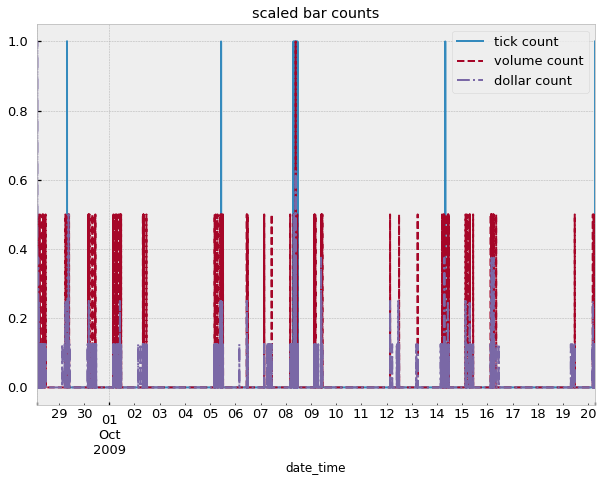

In [48]:
f, ax = plt.subplots(figsize=PLOT_FIGURE_SIZE)
tc.plot(ax=ax, ls="-", label="tick count")
vc.plot(ax=ax, ls="--", label="volume count")
dc.plot(ax=ax, ls="-.", label="dollar count")
ax.set_title("scaled bar counts")
ax.legend()

## Which Bar Type Has Most Stable Counts?

In [49]:
bar_types = ["tick", "volume", "dollar", "df"]
bar_std = [tc.std(), vc.std(), dc.std(), dfc.std()]
counts = pd.Series(bar_std, index=bar_types)
counts.sort_values()

tick      0.002350
dollar    0.003117
df        0.003117
volume    0.004139
dtype: float64

## Which Bar Type Has the Lowest Serial Correlation?

In [50]:
def returns(s):
    arr = np.diff(np.log(s))
    return pd.Series(arr, index=s.index[1:])

In [51]:
tr = returns(tick_df.cum_dollar_value)
vr = returns(v_bar_df.cum_dollar_value)
dr = returns(dv_bar_df.cum_dollar_value)
df_ret = returns(df.price)

bar_returns = [tr, vr, dr, df_ret]

In [52]:
def get_test_stats(bar_types, bar_returns, test_func, *args, **kwargs):

    dct = {
        bar_plot: (int(bar_ret.shape[0]), test_func(bar_ret, *args, **kwargs))
        for bar_plot, bar_ret in zip(bar_types, bar_returns)
    }

    df = (
        pd.DataFrame.from_dict(dct)
        .rename(index={0: "sample_size", 1: f"{test_func.__name__}_stat"})
        .T
    )
    return df


autocorrs = get_test_stats(bar_types, bar_returns, pd.Series.autocorr)

In [53]:
autocorrs.sort_values("autocorr_stat")

,sample_size,autocorr_stat
volume,128.0,-0.488608
dollar,999.0,-0.394214
tick,9.0,-0.032794
df,999.0,-0.018129


In [54]:
autocorrs.abs().sort_values("autocorr_stat")

,sample_size,autocorr_stat
df,999.0,0.018129
tick,9.0,0.032794
dollar,999.0,0.394214
volume,128.0,0.488608


In [55]:
def plot_autocorr(bar_types, bar_returns):
    _, axes = plt.subplots(len(bar_types), figsize=PLOT_FIGURE_SIZE)
    min_lags = min(map(len, bar_returns))
    for i, (bar_plot, typ) in enumerate(zip(bar_returns, bar_types)):
        sm.graphics.tsa.plot_acf(
            bar_plot,
            lags=min_lags - 1,
            ax=axes[i],
            alpha=0.05,
            unbiased=True,
            fft=True,
            zero=False,
            title=f"{typ} AutoCorr",
        )
    plt.tight_layout()


def plot_hist(bar_types, bar_returns):
    _, axes = plt.subplots(len(bar_types), figsize=PLOT_FIGURE_SIZE)
    for i, (bar_plot, typ) in enumerate(zip(bar_returns, bar_types)):
        g = sns.distplot(bar_plot, ax=axes[i], kde=False, label=typ)
        g.set(yscale="log")
        axes[i].legend()
    plt.tight_layout()

<ipython-input-55-9b35769ca1cf>:5: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  sm.graphics.tsa.plot_acf(bar,
<ipython-input-55-9b35769ca1cf>:5: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  sm.graphics.tsa.plot_acf(bar,
<ipython-input-55-9b35769ca1cf>:5: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  sm.graphics.tsa.plot_acf(bar,
<ipython-input-55-9b35769ca1cf>:5: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  sm.graphics.tsa.plot_acf(bar,


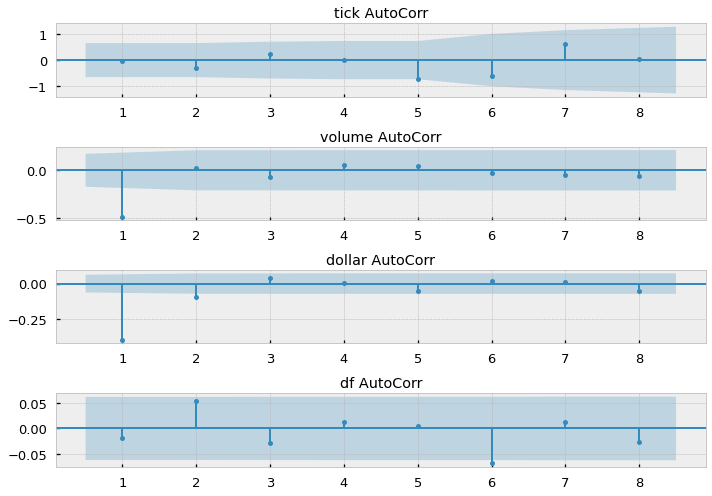

In [56]:
plot_autocorr(bar_types, bar_returns)

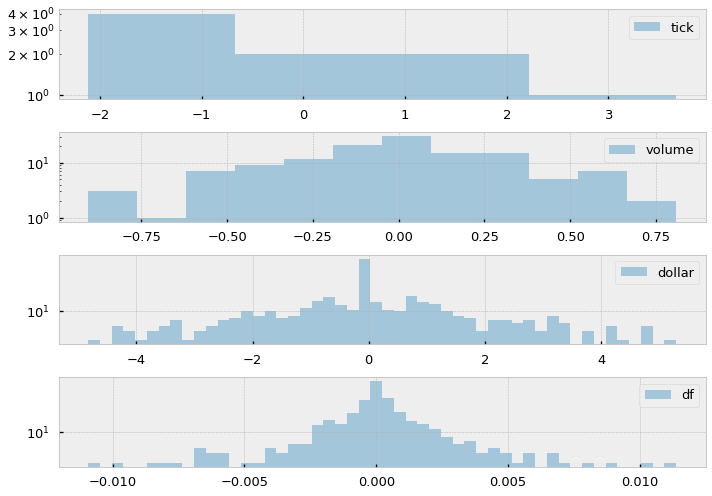

In [57]:
plot_hist(bar_types, bar_returns)

## Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance

In [58]:
def partition_monthly(s):
    return s.resample("1M").var()

In [59]:
tr_rs = partition_monthly(tr)
vr_rs = partition_monthly(vr)
dr_rs = partition_monthly(dr)
df_ret_rs = partition_monthly(df_ret)
monthly_vars = [tr_rs, vr_rs, dr_rs, df_ret_rs]

In [60]:
get_test_stats(bar_types, monthly_vars, np.var).sort_values("var_stat")

,sample_size,var_stat
tick,1.0,0.000000e+00
df,2.0,2.352561e-12
volume,2.0,2.337756e-03
dollar,2.0,6.022845e-01


## Compute Jarque-Bera Test, Which Has The Lowest Test Statistic?

In [61]:
def jb(x, test=True):
    np.random.seed(12345678)
    if test:
        return stats.jarque_bera(x)[0]
    return stats.jarque_bera(x)[1]


get_test_stats(bar_types, bar_returns, jb).sort_values("jb_stat")

,sample_size,jb_stat
volume,128.0,0.427577
tick,9.0,1.282019
dollar,999.0,1731.003924
df,999.0,13309.106992


## Compute Shapiro-Wilk Test

Shapiro-Wilk test statistic > larger is better.

In [62]:
def shapiro(x, test=True):
    np.random.seed(12345678)
    if test:
        return stats.shapiro(x)[0]
    return stats.shapiro(x)[1]


get_test_stats(bar_types, bar_returns, shapiro).sort_values("shapiro_stat")[::-1]

,sample_size,shapiro_stat
volume,128.0,0.988020
tick,9.0,0.917787
dollar,999.0,0.722935
df,999.0,0.659137
